In [1]:
import os
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('..')

In [3]:
data = pd.read_csv('data_ptb-xl/ptbxl_database.csv')
data.head()

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr


(0.0, 100.0)

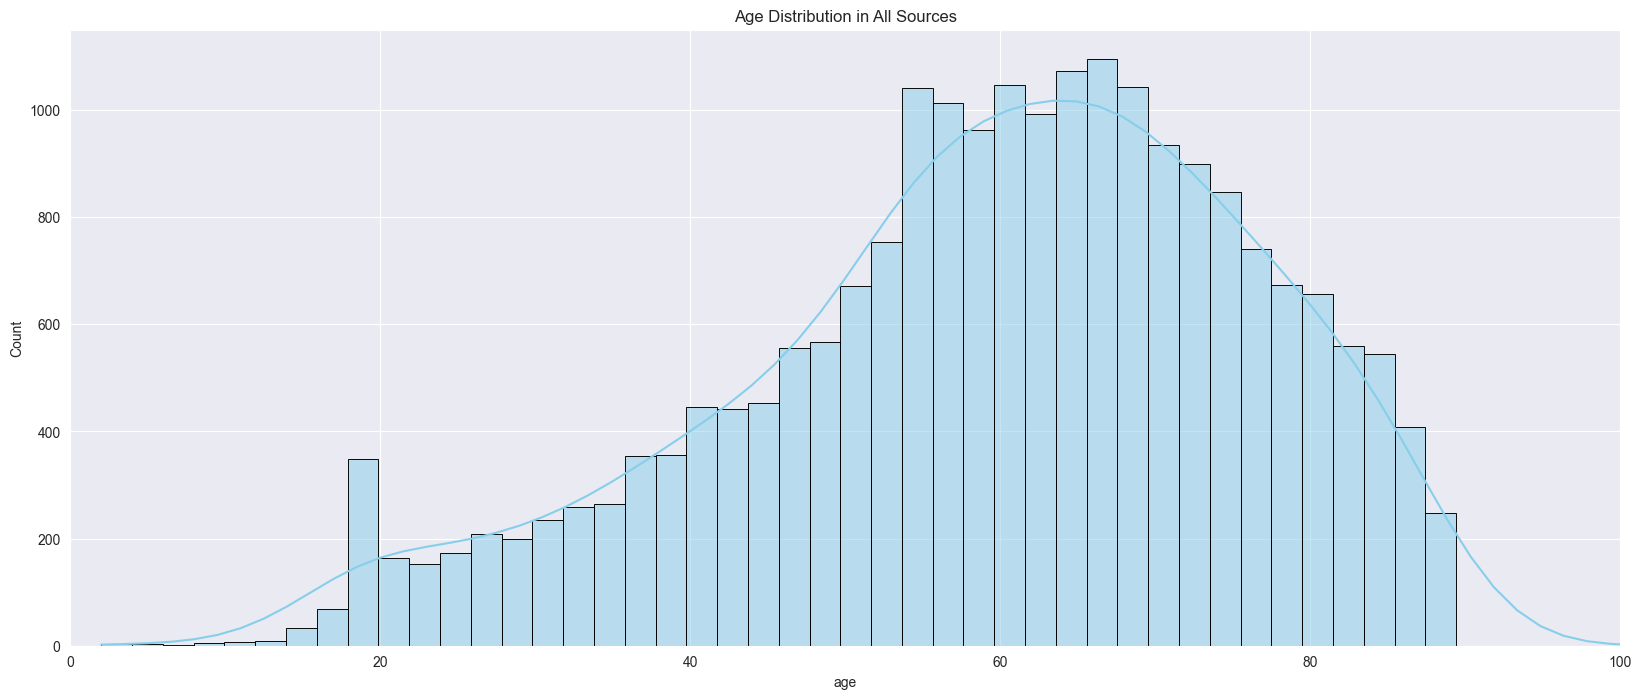

In [4]:
plt.figure(figsize=(20, 8))
sns.histplot(data['age'], bins=150, kde=True, color='skyblue', edgecolor='black')
plt.title('Age Distribution in All Sources')
plt.xlim([0, 100])

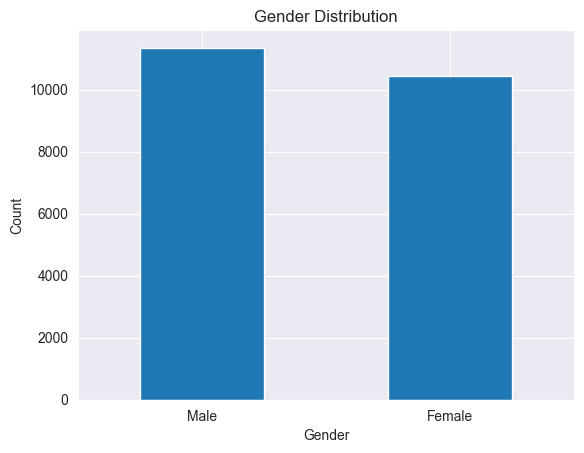

In [5]:
gender_counts = data['sex'].value_counts()

gender_counts.plot(kind='bar')

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)

plt.show()

Text(0.5, 1.0, 'Word Counts in Report')

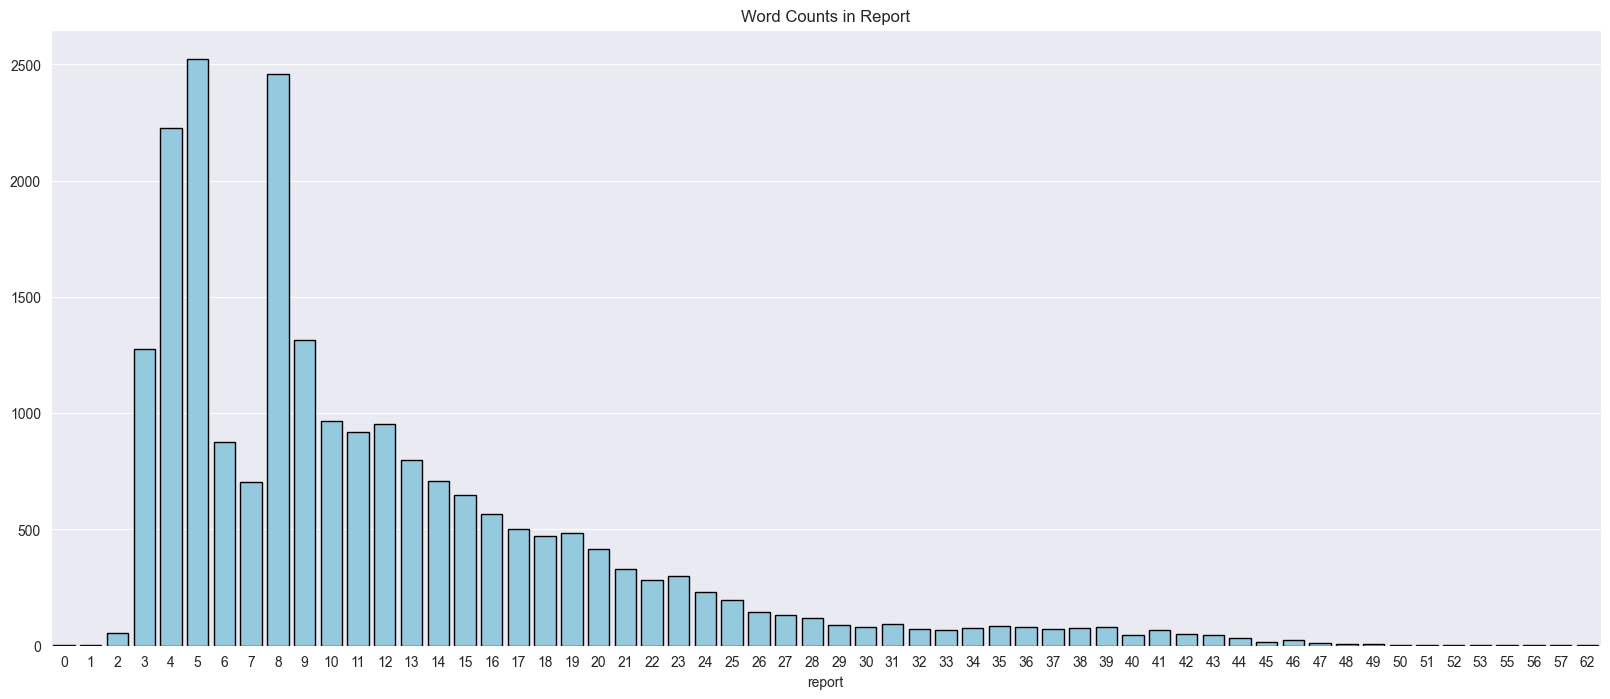

In [6]:
word_counts = data['report'].apply(lambda x: len(str(x).split()))
word_count_frequency = word_counts.value_counts().sort_index()

plt.figure(figsize=(20, 8))
sns.barplot(x=word_count_frequency.index, y=word_count_frequency.values, color='skyblue', edgecolor='black')
plt.title('Word Counts in Report')

In [7]:
print(f"German Report:  {data.loc[data['ecg_id'] == 97].report.values[0]}")
print(f"Swedish Report: {data.loc[data['ecg_id'] == 168].report.values[0]}")
print(f"English Report: {data.loc[data['ecg_id'] == 276].report.values[0]}")

German Report:  sinusrhythmus linkstyp sonst normales ekg
Swedish Report: sinusrytm vÄnster el-axel st-t sÄnkning, sÅsom vid    anterolateral ischemi eller vÄnster belastning
English Report: sinus rhythm. minor non-specific t wave flattening in limb leads and    v5,6.


In [8]:
data.iloc[data['report'].apply(lambda x: len(str(x).split())).argmax()]['report']

'sinus rhythm. r-s transition zone in v leads displaced to the left. voltages are high in limb leads suggesting lvh. st segments are depressed in i, avl, v6. t waves are inverted in i, ii, avl, v2-6. this may be due to lv strain or ischaemia. prolonged qt, Edit: INJAS, INJAL, Sokolow 3,1 aber sehr hohe Amplituden in Standardableitungen(INJAS, INJAL, LVH 100)'

# check report

In [9]:
data

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21794,21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,...,True,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr
21795,21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,...,True,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr
21796,21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,...,True,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr
21797,21836,8873.0,64.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-09 18:21:49,...,True,NaN,NaN,NaN,NaN,SVES,NaN,8,records100/21000/21836_lr,records500/21000/21836_hr


In [13]:
data.validated_by_human.value_counts()

validated_by_human
True     16056
False     5743
Name: count, dtype: int64

In [17]:
data.validated_by.value_counts()

validated_by
0.0     6120
1.0     5127
2.0      566
3.0      175
4.0      115
6.0      100
5.0       90
7.0       75
8.0       37
9.0        9
10.0       6
11.0       1
Name: count, dtype: int64